### Importing Libraries

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

### Getting HTML from Booking.com

In [20]:
url = "https://www.booking.com/searchresults.en-gb.html?ss=United+States&ssne=United+States&ssne_untouched=United+States&efdco=1&label=gen173nr-1BCAEoggI46AdIM1gEaKcBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuAKW18W1BsACAdICJDUzZDY1M2JjLWUzMmUtNDUzNy1iYTRlLWQ1YTE5OWY5NWU1NdgCBeACAQ&sid=47e61d0859026259a0ff04b6d3ad19ec&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=224&dest_type=country&checkin=2024-12-21&checkout=2025-03-21&group_adults=1&no_rooms=1&group_children=0&selected_currency=USD&rows=100"

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response  = requests.get(url, headers=headers)

### Data Extraction

In [21]:
soup = BeautifulSoup(response.text, 'html.parser')

From a list of hotels, we will retrieve the following information:</br>
**(Inspect page element to get the correct tags)**

-Hotel Name
-Location
-Price

In [22]:
# Find all the hotel elements in the HTML document
hotels = soup.findAll('div', {'data-testid': 'property-card'})

hotels_data = []
# Loop over the hotel elements and extract the desired data
for hotel in hotels:
    # Extract the hotel name
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    # Extract the hotel location
    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    # Extract the hotel price
    price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
    price = price_element.text.strip()
    
    
    # Append hotes_data with info about hotel
    hotels_data.append({
        'name': name,
        'location': location,
        'price': price
    })

### Defining the Dataframe

In [23]:
hotels = pd.DataFrame(hotels_data)
hotels.head()

,name,location,price
0,Venice Beach International Traveler Cabins,"Venice Beach, Los Angeles","US$5,527"
1,"Quiet Mind Lodge, Spa & Retreat Sequoias",Kernville,"US$15,070"
2,The Inn at Virginia Tech - On Campus,Blacksburg,"US$16,138"
3,Outbound Mammoth,Mammoth Lakes,"US$33,077"
4,Stonehill Cottages,Mena,"US$26,658"


### Generate CSV file

In [24]:
hotels.to_csv('hotels.csv', header=True, index=False)

### Problem

The html is returning data with NGN price, instead of USD prices, maybe Somto will have to use his own url or vpn might work, as it is showing usd on the webpage but the requests is not getting usd </br>
This was solved by adding "&selected_currency=USD" to the url

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the initial URL and headers
base_url = "https://www.booking.com/searchresults.en-gb.html"
params = {
    'ss': 'United States',
    'ssne': 'United States',
    'ssne_untouched': 'United States',
    'efdco': 1,
    'label': 'gen173nr-1BCAEoggI46AdIM1gEaKcBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuAKW18W1BsACAdICJDUzZDY1M2JjLWUzMmUtNDUzNy1iYTRlLWQ1YTE5OWY5NWU1NdgCBeACAQ',
    'sid': '47e61d0859026259a0ff04b6d3ad19ec',
    'aid': 304142,
    'lang': 'en-gb',
    'sb': 1,
    'src_elem': 'sb',
    'src': 'searchresults',
    'dest_id': 224,
    'dest_type': 'country',
    'checkin': '2024-12-21',
    'checkout': '2025-03-21',
    'group_adults': 1,
    'no_rooms': 1,
    'group_children': 0,
    'selected_currency': 'USD',
    # 'rows': 100  # Number of rows
}

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

def get_hotel_data(soup):
    hotels = soup.findAll('div', {'data-testid': 'property-card'})
    hotels_data = []
    for hotel in hotels:
        # Extract the hotel name
        name_element = hotel.find('div', {'data-testid': 'title'})
        name = name_element.text.strip() if name_element else None

        # Extract the hotel location
        location_element = hotel.find('span', {'data-testid': 'address'})
        location = location_element.text.strip() if location_element else None

        # Extract the hotel price
        price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
        price = price_element.text.strip() if price_element else None

        # Append hotels_data with info about hotel
        hotels_data.append({
            'name': name,
            'location': location,
            'price': price
        })
    return hotels_data


all_hotels_data = []

# Initial request
response = requests.get(base_url, headers=headers, params=params)
soup = BeautifulSoup(response.content, 'html.parser')
all_hotels_data.extend(get_hotel_data(soup))


# Convert to DataFrame
df_hotel = pd.DataFrame(all_hotels_data)

# Save DataFrame to CSV
df_hotel.to_csv('us_hotel_prices.csv', index=False)

print("Data has been saved to 'us_hotel_prices.csv'")


Data has been saved to 'us_hotel_prices.csv'


In [48]:
df_hotel.dtypes

name        object
location    object
price       object
dtype: object

In [45]:
df.head()

,name,location,price
0,Venice Beach International Traveler Cabins,"Venice Beach, Los Angeles","US$5,527"
1,"Quiet Mind Lodge, Spa & Retreat Sequoias",Kernville,"US$15,070"
2,The Inn at Virginia Tech - On Campus,Blacksburg,"US$16,138"
3,Outbound Mammoth,Mammoth Lakes,"US$33,077"
4,Stonehill Cottages,Mena,"US$26,658"


Top 5 Cheapest States by Average Hotel Price:
        state  price
0      Alaska    NaN
1     Arizona    NaN
2  California    NaN
3     Florida    NaN
4     Indiana    NaN


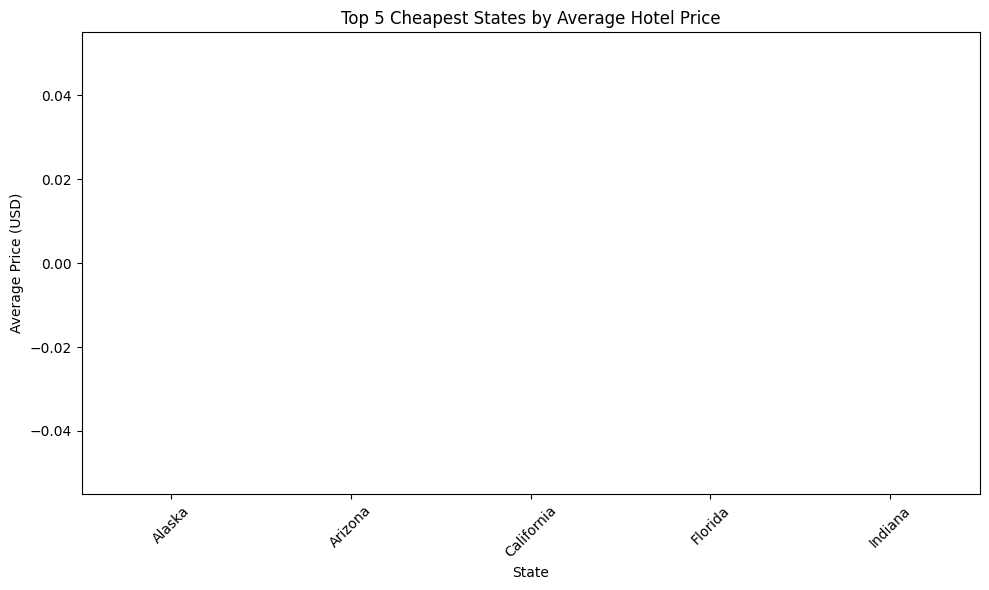

In [46]:
from geopy.geocoders import Nominatim
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize geolocator
geolocator = Nominatim(user_agent="hotel_price_analysis")

def get_state_from_location(location):
    try:
        location_info = geolocator.geocode(location, addressdetails=True)
        if location_info and 'state' in location_info.raw['address']:
            return location_info.raw['address']['state']
    except Exception as e:
        print(f"Error geocoding {location}: {e}")
    return None


df = df_hotel.copy()

# Extract states from locations
df['state'] = df['location'].apply(get_state_from_location)


# Clean the price column
df['price'] = df['price'].str.replace('US$', '', regex=True)  # Remove 'US$'
df['price'] = df['price'].str.replace(',', '', regex=True)   # Remove commas
df['price'] = df['price'].str.strip()                        # Remove any extra whitespace
df['price'] = pd.to_numeric(df['price'], errors='coerce')   # Convert to float

# Drop rows where state or price is missing
# df = df.dropna(subset=['state', 'price'])

# Calculate average price per state
state_prices = df.groupby('state')['price'].mean().reset_index()

# Sort states by average price
state_prices_sorted = state_prices.sort_values(by='price')

# Get the top 5 cheapest states
top_5_cheapest_states = state_prices_sorted.head(5)

# Display the top 5 cheapest states in a table
print("Top 5 Cheapest States by Average Hotel Price:")
print(top_5_cheapest_states)

# Plot the top 5 cheapest states
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_cheapest_states, x='state', y='price', palette='viridis')
plt.title('Top 5 Cheapest States by Average Hotel Price')
plt.xlabel('State')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('top_5_cheapest_states.png')

# Show the plot
plt.show()